###**Name -: Nihaal Patel**

###**Roll No.-: 045035 Section-H (BDA-04)**



---



# **Machine Learning For Managers (Term-03)**

# **Project -01**




---



# **Project Title -:**

# **Understanding Traffic Patterns in Futuristic Urban Environments**

"Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption."



---



#**Section-01 (Objectives)**

#**Objective 01:** Clustering or Segment the Data

The primary objective of this project is to apply clustering techniques to the Urban traffic density in cities dataset in order to segment the employees based on certain characteristics. Clustering allows us to group similar individuals together, enabling us to identify patterns and gain insights into the underlying structure of the data.

#**Objective 02:** Determine the Number of Segments/Clusters

Another important objective is to determine the optimal number of segments or clusters in the dataset. Identifying the appropriate number of clusters is crucial for meaningful segmentation and interpretation of the results. We will use methods such as the elbow method, silhouette score, and/or silhouette analysis to determine the optimal number of clusters.

#**Objective 03:** Explore Characteristics of Segments/Clusters

Once the data is segmented into clusters, the next objective is to explore the characteristics of each segment or cluster. This involves analyzing the distribution of various attributes within each cluster, such as salary levels, job titles, and other demographic or employment-related features. By understanding the unique characteristics of each cluster, we can gain valuable insights into the different groups of employees within the organization.



---


###**Importing & Loading Libraries**

In [1]:
# Install PyDataset
!pip install pydataset

# @title load library { display-mode: "form" }
# Load IPython extension for measuring time
!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939417 sha256=750711e2c51a6451f229ff23e1f4126e561a4c3f49781ae36a9ae16fba46b47d
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00
time: 7.05 s (started: 2024-03-20 20:49:48 +00:00)


In [2]:
# Required Libraries
from pydataset import data
import random as rnd, numpy as np
import matplotlib.pyplot as plt
import pandas as pd, numpy as np # For Data Manipulation
import scipy.stats as sps # For Probability & Inferential Statistics
import statsmodels.api as sm
import statsmodels as sm, statsmodels.formula.api as smf # For Descriptive Statistics & Regression

from memory_profiler import memory_usage
import time

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation



initiated datasets repo at: /root/.pydataset/
time: 4.21 s (started: 2024-03-20 20:49:56 +00:00)


In [3]:
# Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 102 ms (started: 2024-03-20 20:50:00 +00:00)




---



#**Section-02 (Data Description & Statistics)**

###**1.) Dataset Overview**

This dataset provides a detailed view of traffic data in a futuristic urban environment, containing over 50k records. Each record represents a unique snapshot of various factors affecting traffic conditions in six fictional cities.

####**Shape of the Data-:** 53901 rows × 11 columns
####**Features / Variables-:**

**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2) Vehicle Type:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week:** Day of the week.

**6.) Hour of Day:** Hour of the day when the data was recorded.
Speed: Recorded vehicle speed.

**7.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**8.) Is Peak Hour:** Indicator if the record was during peak traffic hours.

**9.) Random Event Occurred:** Indicator if a random event (e.g., accidents, road closures) occurred.

**10.) Traffic Density:** Density of traffic at the time of recording.

###**2.) Source of Data -:** **https://www.kaggle.com/datasets/tanishqdublish/urban-traffic-density-in-cities**

The dataset is provided in CSV format, suitable for analysis in various data processing tools and programming languages.

**Potential Uses -:**

This dataset can be utilized for a variety of studies and analyses, including:
Understanding traffic patterns in futuristic urban environments.
Analyzing the impact of factors like weather, economic conditions, and vehicle types on traffic flow and energy consumption.
Developing and testing traffic management algorithms, especially for autonomous vehicles and smart city solutions.

###**Data Imporitng & Reading**

In [4]:
# Import & Read Dataset
df = pd.read_csv('/content/futuristic_city_traffic -data.csv')

# Display & Describe Dataset Information
df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
53896,MetropolisX,Autonomous Vehicle,Snowy,Booming,Friday,10,45.8221,0,0,43.8489,0.4784
53897,Neuroburg,Autonomous Vehicle,Electromagnetic Storm,Recession,Tuesday,22,38.7085,0,0,37.0417,0.0424
53898,AquaCity,Autonomous Vehicle,Solar Flare,Booming,Saturday,2,90.7418,0,0,72.5934,0.5811
53899,MetropolisX,Autonomous Vehicle,Solar Flare,Recession,Saturday,5,60.8918,0,0,87.8670,0.1985


time: 253 ms (started: 2024-03-20 20:50:00 +00:00)
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


###**3.) Variable Description -:**

**a.)** **Index Variable-:**  Since in our data set there no such variable which is having unique value that can be used as Index Variable. So we are Creating Index Variable.

In [5]:
# Create an index variable
df['index_variable'] = range(len(df))

# Set the index to the new index variable
df.set_index('index_variable', inplace=True)

# Display the DataFrame with the new index variable

df

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
index_variable,,,,,,,,,,,
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544
...,...,...,...,...,...,...,...,...,...,...,...
53896,MetropolisX,Autonomous Vehicle,Snowy,Booming,Friday,10,45.8221,0,0,43.8489,0.4784
53897,Neuroburg,Autonomous Vehicle,Electromagnetic Storm,Recession,Tuesday,22,38.7085,0,0,37.0417,0.0424
53898,AquaCity,Autonomous Vehicle,Solar Flare,Booming,Saturday,2,90.7418,0,0,72.5934,0.5811


time: 164 ms (started: 2024-03-20 20:50:00 +00:00)


**b.) Identification & Bifurcation of Variables into Categorical and Non-Categorical**

We have identified some of the significant Categorical & Non-Categorical Varibales in the Data Set.

**Categorical Variables-:**

**1.) City:** Name of the city (e.g., MetropolisX, SolarisVille).

**2.) Vehicle Type:** Type of vehicle (e.g., Car, Flying Car).

**3.) Weather Conditions:** Current weather (e.g., Clear, Rainy).

**4.) Economic Conditions:** Economic state of the city (e.g., Booming, Recession).

**5.) Day of Week:** Day of the week.

**Non-Categorical Varibales-:**

**1.) Energy Consumption:** Estimated energy consumption based on vehicle type and speed.

**2.) Traffic Density:** Density of traffic at the time of recording.

####**Categorical Variables**

In [6]:
# Subset of Categorical Variables
df_cat = df[['City', 'Weather', 'Economic Condition', 'Day Of Week', 'Vehicle Type']]
df_cat


,City,Weather,Economic Condition,Day Of Week,Vehicle Type
index_variable,,,,,
0,SolarisVille,Snowy,Stable,Sunday,Drone
1,AquaCity,Solar Flare,Recession,Wednesday,Flying Car
2,Neuroburg,Solar Flare,Recession,Wednesday,Autonomous Vehicle
3,Ecoopolis,Clear,Booming,Thursday,Drone
4,AquaCity,Solar Flare,Stable,Saturday,Autonomous Vehicle
...,...,...,...,...,...
53896,MetropolisX,Snowy,Booming,Friday,Autonomous Vehicle
53897,Neuroburg,Electromagnetic Storm,Recession,Tuesday,Autonomous Vehicle
53898,AquaCity,Solar Flare,Booming,Saturday,Autonomous Vehicle


time: 111 ms (started: 2024-03-20 20:50:00 +00:00)


####**Non-Categorical Variables**

In [7]:
# Subset of Non-Categorical Variables
df_noncat = df[['Speed', 'Energy Consumption', 'Traffic Density']]
df_noncat

,Speed,Energy Consumption,Traffic Density
index_variable,,,
0,29.4268,14.7134,0.5241
1,118.8000,143.5682,0.3208
2,100.3904,91.2640,0.0415
3,76.8000,46.0753,0.1811
4,45.2176,40.1934,0.4544
...,...,...,...
53896,45.8221,43.8489,0.4784
53897,38.7085,37.0417,0.0424
53898,90.7418,72.5934,0.5811


time: 44.6 ms (started: 2024-03-20 20:50:00 +00:00)


####**C.) Descriptive Statistics of Categorical Variables**

**1.) City**

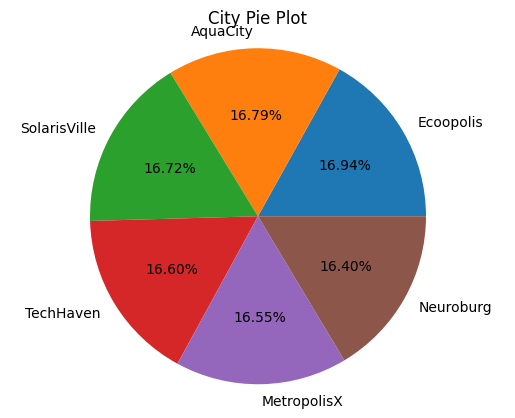

,index,count,percentage
0,Ecoopolis,9129,17.0
1,AquaCity,9049,17.0
2,SolarisVille,9013,17.0
3,TechHaven,8947,17.0
4,MetropolisX,8921,17.0
5,Neuroburg,8842,16.0


time: 246 ms (started: 2024-03-20 20:50:00 +00:00)


In [8]:
# Count Statistics of Categorical Variables
#For City
City_stats = pd.concat([df_cat['City'].value_counts(), df['City'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(City_stats['count'], labels=City_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('City Pie Plot')
plt.show()
City_stats

**a.)** All the six cities mentioned in the pie chart (SolarisVille, Ecoopolis, TechHaven, Neuroburg, MetropolisX and AquaCity) have a nearly equal share of the whole pie chart.

**b.)** AquaCity has the biggest share (16.94%) compared to all the other cities.

**2.) Weather**

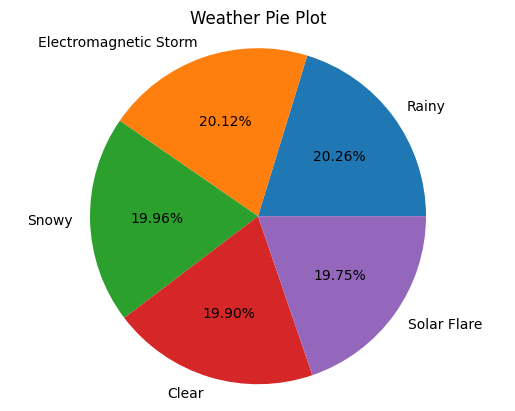

,index,count,percentage
0,Rainy,10922,20.0
1,Electromagnetic Storm,10846,20.0
2,Snowy,10759,20.0
3,Clear,10727,20.0
4,Solar Flare,10647,20.0


time: 175 ms (started: 2024-03-20 20:50:01 +00:00)


In [9]:
#For Weather
Weather_stats = pd.concat([df['Weather'].value_counts(), df['Weather'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()

# Pie Plot
plt.pie(Weather_stats['count'], labels=Weather_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Weather Pie Plot')
plt.show()
Weather_stats

**a.)** The weather conditions are fairly evenly distributed, with no single type of weather dominating a significant portion of the pie chart.

**b.)** Electromagnetic Storm, Rainy, and Snowy weather each occupy a slice that is around 20% of the pie chart.

**3.) Economic Condition**

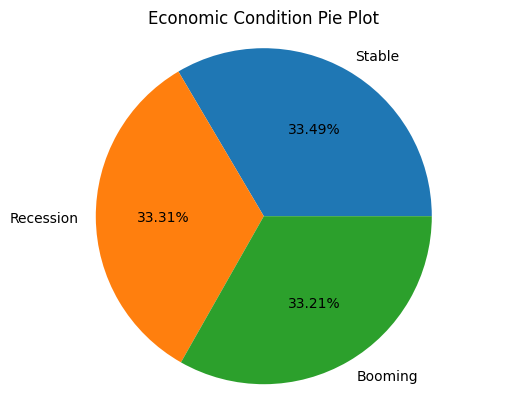

,index,count,percentage
0,Stable,18050,33.0
1,Recession,17953,33.0
2,Booming,17898,33.0


time: 164 ms (started: 2024-03-20 20:50:01 +00:00)


In [10]:
#For Economic_Condition
Economic_Condition_stats = pd.concat([df['Economic Condition'].value_counts(), df['Economic Condition'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Economic_Condition_stats['count'], labels=Economic_Condition_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Economic Condition Pie Plot')
plt.show()
Economic_Condition_stats

**a.)** Pie charts are not ideal for showing trends over time.

**b.)** The data used to create the pie chart may not be current.

**4.) Day Of Week**

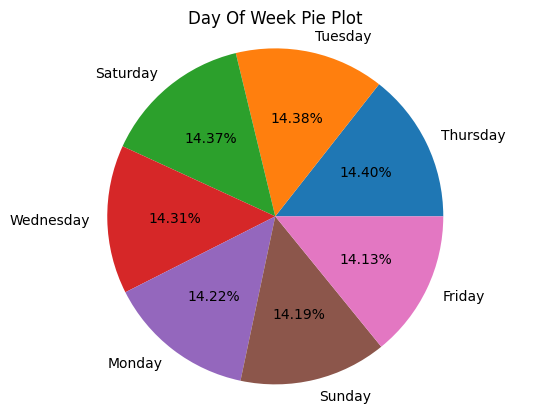

,index,count,percentage
0,Thursday,7763,14.0
1,Tuesday,7749,14.0
2,Saturday,7746,14.0
3,Wednesday,7714,14.0
4,Monday,7665,14.0
5,Sunday,7646,14.0
6,Friday,7618,14.0


time: 223 ms (started: 2024-03-20 20:50:01 +00:00)


In [11]:
#For Day Of Week
Day_Of_Week_stats = pd.concat([df['Day Of Week'].value_counts(), df['Day Of Week'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Day_Of_Week_stats['count'], labels=Day_Of_Week_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Day Of Week Pie Plot')
plt.show()
Day_Of_Week_stats

**a.)** The distribution of pie sales is relatively consistent across the week. There is no single day that sees a significantly higher or lower volume of pie sales compared to the others.

**b.)** Tuesdays have the highest percentage of pies sold (14.38%), while Sundays have the lowest (14.13%). However the difference is small (only 0.25%).

**5.) Vehicle Type**

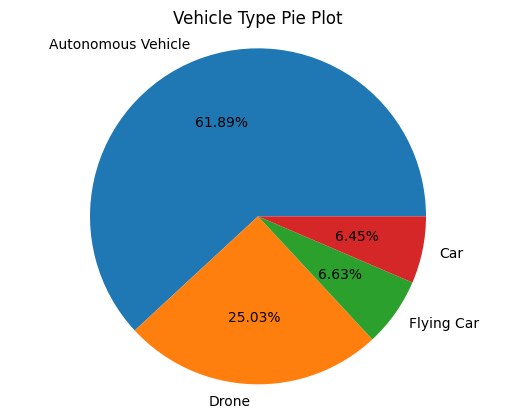

,index,count,percentage
0,Autonomous Vehicle,33357,62.0
1,Drone,13493,25.0
2,Flying Car,3575,7.0
3,Car,3476,6.0


time: 215 ms (started: 2024-03-20 20:50:01 +00:00)


In [12]:
#For Vehicle Type
Vehicle_Type_stats = pd.concat([df['Vehicle Type'].value_counts(), df['Vehicle Type'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage')).reset_index()
# Pie Plot
plt.pie(Vehicle_Type_stats['count'], labels=Vehicle_Type_stats['index'], autopct='%0.2f%%')
plt.axis('equal')
plt.title('Vehicle Type Pie Plot')
plt.show()
Vehicle_Type_stats

**a.)** Autonomous vehicles are the dominant mode of transport, accounting for over 60% of the total.

**b.)** Flying cars are a more common mode of transport than traditional cars in this dataset.

####**d.) Descriptive Statistics of Non-Categorical Variables**

**1.) Speed**

Mean of Speed is = 59.95
St. Dev. of Speed is = 26.57


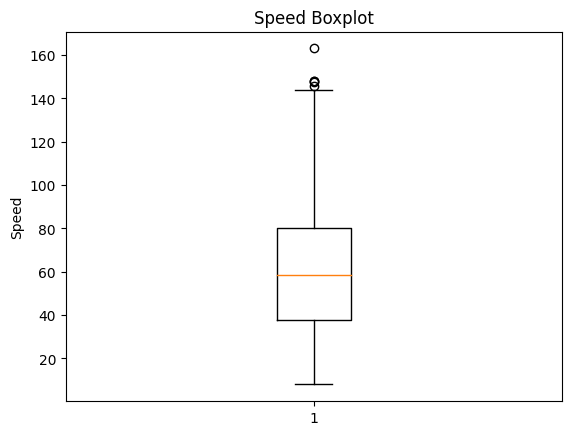

time: 351 ms (started: 2024-03-20 20:50:02 +00:00)


In [13]:
# Mean (Speed)
Speed_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Speed is =", Speed_mean)
# Std. Dev. (mpg)
Speed_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Speed is =", Speed_sd)

plt.boxplot(df_noncat['Speed'])
plt.ylabel('Speed')
plt.title('Speed Boxplot')
plt.show()

**a.)** The median speed is around 60.

**b.)** There is a spread of data in the center of the box, indicating some variation in speeds around the median.

**c.)** The whiskers are relatively short, which means that most of the data is clustered around the median.

**d.)** There are a few outliers at the higher end of the speed range.

**2.) Energy Consumption**

Mean of Energy Consumption is = 59.95
St. Dev. of Energy Consumption is = 59.95


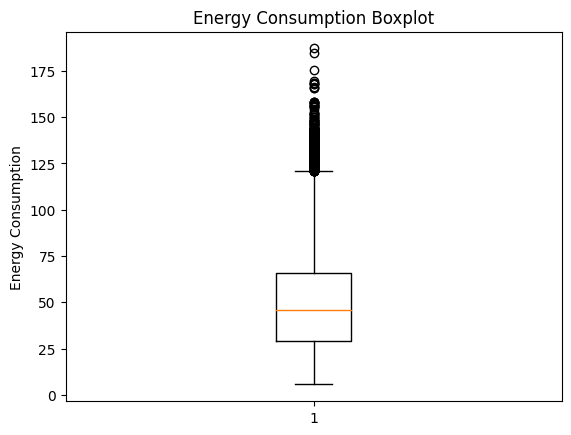

time: 205 ms (started: 2024-03-20 20:50:02 +00:00)


In [14]:
# Mean (Energy Consumption)
Energy_Consumption_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Energy Consumption is =", Energy_Consumption_mean)
# Std. Dev. (mpg)
Energy_Consumption_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Energy Consumption is =", Energy_Consumption_mean)

plt.boxplot(df_noncat['Energy Consumption'])
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Boxplot')
plt.show()

**a) Center tendency:** The median speed is most likely around 75, as this value falls in the middle of the box. This means that half of the speeds are higher than 75 and the other half are lower.

**b.) Distribution of speeds:** The box in the center of the plot is relatively short, indicating that the middle 50% of the data points are clustered together. There is likely not a significant variation in speeds within this central group.

**c.) Variability:** The whiskers extend further upwards compared to downwards, indicating that there may be more data points with speeds higher than 75 than there are with speeds lower than 75. There are also a few outliers at the higher end of the speed range, which are data points that differ significantly from the majority.

**3.) Traffic Density**

Mean of Traffic Density is = 59.95
St. Dev. of Traffic Density is = 26.57


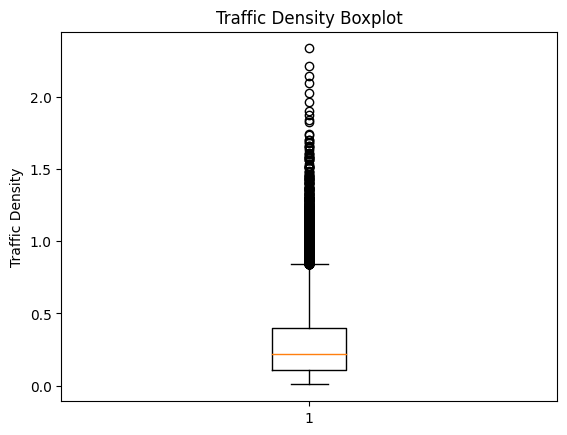

time: 213 ms (started: 2024-03-20 20:50:02 +00:00)


In [15]:
# Mean (Traffic Density)
Traffic_Density_mean = round(np.mean(df_noncat.Speed), 2)
print("Mean of Traffic Density is =", Traffic_Density_mean)
# Std. Dev. (mpg)
Traffic_Density_sd = round(np.std(df_noncat.Speed), 2)
print("St. Dev. of Traffic Density is =", Traffic_Density_sd)

plt.boxplot(df_noncat['Traffic Density'])
plt.ylabel('Traffic Density')
plt.title('Traffic Density Boxplot')
plt.show()

**a.) Center tendency:** The median traffic density is likely around 0.75 vehicles/km (vehicles per kilometer). This means that half of the measured traffic densities are higher than 0.75 vehicles/km and the other half are lower.

**b.) Distribution of traffic density:** The size of the box indicates the spread of traffic densities in the middle 50% of the data. A relatively small box, like the one in this image, suggests that there is not a large variation in traffic densities within this central group.

**c.) Variability:** The whiskers are short, which means that most of the data points are clustered around the median. There are a few outliers on the lower end, indicated by the individual dots below the whiskers. This suggests that there were a few instances where the traffic density was much lower than the typical values.



---



#**Section-03 (Data Analysis)**

##**1.) Data Pre-Processing**

###**a.) Missing Data Information**

In [16]:
# Dataframe Information (Provide Information on Missing Data)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53901 entries, 0 to 53900
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   53901 non-null  object 
 1   Vehicle Type           53901 non-null  object 
 2   Weather                53901 non-null  object 
 3   Economic Condition     53901 non-null  object 
 4   Day Of Week            53901 non-null  object 
 5   Hour Of Day            53901 non-null  int64  
 6   Speed                  53901 non-null  float64
 7   Is Peak Hour           53901 non-null  int64  
 8   Random Event Occurred  53901 non-null  int64  
 9   Energy Consumption     53901 non-null  float64
 10  Traffic Density        53901 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.9+ MB
time: 57.2 ms (started: 2024-03-20 20:50:02 +00:00)


**Variable-wise Missing Data Information**

In [17]:
# Variable-wise Missing Data Information
variable_missing_data = df.isna().sum(); variable_missing_data

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

time: 49.1 ms (started: 2024-03-20 20:50:02 +00:00)


**Record-wise Missing Data Information (Top 50000)**

In [18]:
# Record-wise Missing Data Information (Top 50000)
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(50000);
record_missing_data.describe()

count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64

time: 56.4 ms (started: 2024-03-20 20:50:03 +00:00)


**Variable-wise:** There are zero missing values for any of the columns. This means all columns have data for all 53,901 entries.

**Record-wise:** Looking at the top 50,000 entries (record-wise missing data information), there are also zero missing values. This suggests there likely aren't any missing values in the entire dataset (all 53,901 entries).

**Inferences:**

This dataset seems to be well-maintained with no missing data points across the 11 columns and 53,901 entries (at least for the top 50,000 entries checked).
You can proceed with your analysis on this complete dataset with confidence that all information is available.

###**b.) Ordinal Encoding (Superior)**

**Definition-:**
Ordinal encoding is a technique used to convert categorical data into numerical data, where the numerical values represent the order or rank of the categories.

**There are two main reasons why ordinal encoding is used:**

**Machine Learning Compatibility:** Many machine learning algorithms can't directly work with categorical data. Ordinal encoding converts these categories into numerical values that machine learning models can understand and use for calculations.

**Preserving Order:** When the order between categories is meaningful, ordinal encoding is a better choice than other methods like one-hot encoding. One-hot encoding simply converts each category into a separate binary feature, losing the inherent order between them.

In [19]:
from sklearn.preprocessing import OrdinalEncoder
# Dataset Used : df_cat
# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat)
df_cat_oe = pd.DataFrame(oe_fit, columns=df_cat.columns);
#Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder
df_cat_oe

,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,4.0,3.0,2.0,3.0,2.0
1,0.0,4.0,1.0,6.0,3.0
2,3.0,4.0,1.0,6.0,0.0
3,1.0,0.0,0.0,4.0,2.0
4,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0
53897,3.0,1.0,1.0,5.0,0.0
53898,0.0,4.0,0.0,2.0,0.0
53899,2.0,4.0,1.0,2.0,0.0


time: 99.6 ms (started: 2024-03-20 20:50:03 +00:00)


* **Columns:** The data likely has at least six categorical columns based on the headers: City, Weather, Economic Condition, Day of Week, and Vehicle Type.
* **New Values:** The categorical data has been replaced with numerical values. For instance, "City" with a value of "4.0" might correspond to a specific city name like "Los Angeles" in the original data.
* **Encoding Scheme:** Without the original data, it's difficult to determine the exact encoding scheme used. However, it's likely that the encoder assigned numerical values starting from 0 (e.g., 0, 1, 2, ...) to represent the order of the categories within each column.  For example, "Weather" with a value "3.0" might correspond to "Rainy" if "Rainy" appeared after "Sunny" and "Cloudy" in the original data.

**Inferences:**

* Ordinal encoding has been used on this data, likely because the categorical variables have a natural order or ranking. For instance, economic conditions might be classified as "Stable" (1), "Recession" (2), and "Booming" (3), where the numbers reflect increasing economic activity.
* This encoding can be useful for machine learning algorithms that work better with numerical data.

**Limitations:**

* The inference about the order of the categories (e.g., City 4.0 corresponds to Los Angeles) is an assumption based on typical ordinal encoding schemes.  Without the original data, it's difficult to be certain about the specific mapping between categories and numbers.
* Ordinal encoding assumes a meaningful order exists between the categories. If the categorical variables don't have a natural order (e.g., favorite color), ordinal encoding might not be the most appropriate technique.

###**c.) Data Transformation & Rescaling [Treatment of Outliers]**

Data transformation and rescaling are techniques used in data preprocessing to prepare data for analysis. They can improve the performance of machine learning algorithms and make data visualizations more interpretable.

**1. Data Transformation:**

Data transformation involves modifying the format or characteristics of your data to make it suitable for analysis. Here are some common types of data transformation:

* **Normalization:** This technique scales numerical features to a specific range, often between 0 and 1 or -1 and 1. This can be helpful when working with features that have different units or scales.
* **Standardization:** Similar to normalization, standardization scales features to have a mean of 0 and a standard deviation of 1. This can be useful when features have different scales and the distribution is approximately normal.
* **Log transformation:** This transformation is applied to features with a skewed distribution (lopsided towards one side). Taking the logarithm can often make the distribution more symmetrical.
* **Encoding categorical features:** Categorical features (like "color" or "city") need to be converted into numerical values before feeding them into machine learning algorithms. Techniques like one-hot encoding or ordinal encoding can be used for this purpose.

**2. Rescaling:**

Rescaling is a specific type of data transformation that focuses on changing the scale of the data. This can be done using techniques like normalization or standardization mentioned above. Rescaling is particularly useful when you have features with significantly different ranges. Here's why it's important:

* **Distance-based algorithms:** Many machine learning algorithms rely on calculating distances between data points. If features have vastly different scales, features with larger scales will dominate the distance calculations, even if they are not very informative. Rescaling ensures all features contribute equally.
* **Standardization and Normalization:** These techniques are specific rescaling methods that can improve the stability and convergence of some machine learning algorithms (especially those based on gradient descent optimization).

**3. Treatment of Outliers:**

Outliers are data points that fall significantly outside the overall pattern of the data. They can occur due to errors, measurement issues, or natural variations in the data. Outliers can have a negative impact on data analysis and machine learning models. Here are some ways to handle outliers:

* **Identifying outliers:** Techniques like boxplots, z-scores, or interquartile range (IQR) can be used to identify potential outliers.
* **Winsorization:** This technique replaces outliers with values at the upper or lower limits of a specific percentile range (e.g., replacing outliers with values at the 1st and 99th percentiles).
* **Capping:** This technique simply sets a maximum or minimum value for outliers, effectively capping their influence.
* **Removing outliers:** In some cases, outliers might be genuine errors or irrelevant to your analysis. You can choose to remove them, but do so with caution and justification.

**Why do we do data transformation and rescaling?**

There are several reasons why data transformation and rescaling are important:

* **Improved model performance:** By transforming and rescaling data, you can create a more level playing field for features, allowing machine learning algorithms to learn more effectively and potentially leading to better model performance.
* **Enhanced interpretability:**  Rescaling features to a common range can make data visualizations like scatter plots or parallel coordinates easier to interpret.
* **Algorithm stability:**  Normalization and standardization can improve the stability and convergence of some machine learning algorithms, especially those that rely on gradient descent optimization.
* **Handling outliers:** Outlier treatment helps prevent outliers from unduly influencing the analysis or model.



In [20]:
#Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat[['Speed','Energy Consumption','Traffic Density']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=df_noncat.columns);
df_noncat_minmax_norm
# Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler

,Speed,Energy Consumption,Traffic Density
0,0.138433,0.050169,0.221984
1,0.714521,0.759961,0.134693
2,0.595855,0.471845,0.014770
3,0.443795,0.222925,0.074710
4,0.240218,0.190525,0.192057
...,...,...,...
53896,0.244115,0.210661,0.202362
53897,0.198262,0.173164,0.015157
53898,0.533662,0.368999,0.246458
53899,0.341252,0.453133,0.082181


time: 35.6 ms (started: 2024-03-20 20:50:03 +00:00)


**Pre-Processed Categorical Data Subset**

In [21]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_oe.copy();
df_cat_ppd # Preferred Data Subset

,City,Weather,Economic Condition,Day Of Week,Vehicle Type
0,4.0,3.0,2.0,3.0,2.0
1,0.0,4.0,1.0,6.0,3.0
2,3.0,4.0,1.0,6.0,0.0
3,1.0,0.0,0.0,4.0,2.0
4,0.0,4.0,2.0,2.0,0.0
...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0
53897,3.0,1.0,1.0,5.0,0.0
53898,0.0,4.0,0.0,2.0,0.0
53899,2.0,4.0,1.0,2.0,0.0


time: 37.2 ms (started: 2024-03-20 20:50:03 +00:00)


**Pre-Processed Non-Categorical Data Subset**

In [22]:
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_minmax_norm.copy();
df_noncat_ppd # Preferred Data Subset

,Speed,Energy Consumption,Traffic Density
0,0.138433,0.050169,0.221984
1,0.714521,0.759961,0.134693
2,0.595855,0.471845,0.014770
3,0.443795,0.222925,0.074710
4,0.240218,0.190525,0.192057
...,...,...,...
53896,0.244115,0.210661,0.202362
53897,0.198262,0.173164,0.015157
53898,0.533662,0.368999,0.246458
53899,0.341252,0.453133,0.082181


time: 32.4 ms (started: 2024-03-20 20:50:03 +00:00)


**Pre-Processed Dataset**

In [23]:
# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd);
df_ppd # Pre-Processed Dataset

,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density
0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984
1,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693
2,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770
3,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710
4,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057
...,...,...,...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362
53897,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157
53898,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458
53899,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181


time: 61.9 ms (started: 2024-03-20 20:50:03 +00:00)


###**Annova & Chi Sq test**

**Creating a Copy of Pre-Processed Data Set**

In [24]:
df_ppd_copy = df_ppd.copy();
df_ppd_copy

,City,Weather,Economic Condition,Day Of Week,Vehicle Type,Speed,Energy Consumption,Traffic Density
0,4.0,3.0,2.0,3.0,2.0,0.138433,0.050169,0.221984
1,0.0,4.0,1.0,6.0,3.0,0.714521,0.759961,0.134693
2,3.0,4.0,1.0,6.0,0.0,0.595855,0.471845,0.014770
3,1.0,0.0,0.0,4.0,2.0,0.443795,0.222925,0.074710
4,0.0,4.0,2.0,2.0,0.0,0.240218,0.190525,0.192057
...,...,...,...,...,...,...,...,...
53896,2.0,3.0,0.0,0.0,0.0,0.244115,0.210661,0.202362
53897,3.0,1.0,1.0,5.0,0.0,0.198262,0.173164,0.015157
53898,0.0,4.0,0.0,2.0,0.0,0.533662,0.368999,0.246458
53899,2.0,4.0,1.0,2.0,0.0,0.341252,0.453133,0.082181


time: 60.3 ms (started: 2024-03-20 20:50:03 +00:00)


In [25]:
# df_ppd_copy_cat containing categorical variables
df_ppd_copy_cat = df_ppd_copy[['City','Vehicle Type','Weather','Economic Condition','Day Of Week']]
df_ppd_copy_noncat = df_ppd_copy[['Energy Consumption','Traffic Density','Speed']]

time: 4.32 ms (started: 2024-03-20 20:50:03 +00:00)


**Performing Chi-Sq Test on Categorical Variables**

**1.) City & Vehicle Type**

In [26]:
import scipy.stats as stats
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Vehicle Type'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)


Chi-square statistic: 3024.973383186575
P-value: 0.0
Degrees of freedom: 15
Expected frequencies: [[5600.03511994  583.5573366  2265.22990297  600.17764049]
 [5649.54366338  588.71642456 2285.25624756  605.4836645 ]
 [5520.82145044  575.30279587 2233.18775162  591.68800208]
 [5471.93176379  570.20819651 2213.41173633  586.44830337]
 [5577.75627539  581.23574702 2256.2180479   597.78992969]
 [5536.91172706  576.97949945 2239.69631361  593.41245988]]
time: 24.6 ms (started: 2024-03-20 20:50:03 +00:00)


**2.) City & Weather**

In [27]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Weather'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 21.658325253659047
P-value: 0.3593348841670787
Degrees of freedom: 20
Expected frequencies: [[1800.86868518 1820.84662622 1833.60564739 1806.24090462 1787.43813658]
 [1816.78972561 1836.94428675 1849.81610731 1822.20943953 1803.24044081]
 [1775.3950205  1795.09036938 1807.66891152 1780.69124877 1762.15444982]
 [1759.67299308 1779.19392961 1791.66108235 1764.92232055 1746.5496744 ]
 [1793.70421699 1813.60267899 1826.31094043 1799.05506391 1780.32709968]
 [1780.56935864 1800.32210905 1812.937311   1785.88102262 1767.2901987 ]]
time: 23 ms (started: 2024-03-20 20:50:03 +00:00)


**3.) City & Economic Condition**

In [28]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 9.486541858465442
P-value: 0.4866330774312828
Degrees of freedom: 10
Expected frequencies: [[3004.74948517 3013.98298733 3030.2675275 ]
 [3031.31374186 3040.62887516 3057.05738298]
 [2962.24667446 2971.3495668  2987.40375874]
 [2936.01447097 2945.03675256 2960.94877646]
 [2992.79556966 3001.9923378  3018.21209254]
 [2970.88005788 2980.00948034 2996.11046177]]
time: 20.6 ms (started: 2024-03-20 20:50:03 +00:00)


**4.) City & Day of Week**

In [29]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['City'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 27.797774862018127
P-value: 0.5811522389128098
Degrees of freedom: 30
Expected frequencies: [[1278.92399028 1286.81443758 1300.41286804 1283.62468229 1303.26685961
  1300.91651361 1295.0406486 ]
 [1290.23064507 1298.19084989 1311.90950075 1294.97289475 1314.78872377
  1312.41759893 1306.48978683]
 [1260.83334261 1268.61217788 1282.01825569 1265.46754235 1284.83187696
  1282.51477709 1276.72202742]
 [1249.668021   1257.37797072 1270.66533088 1254.26118254 1273.4540361
  1271.15745533 1265.41600341]
 [1273.83599562 1281.69505204 1295.23938331 1278.51798668 1298.08202074
  1295.74102521 1289.88853639]
 [1264.50800542 1272.30951188 1285.75466132 1269.1557114  1288.57648281
  1286.25262982 1280.44299735]]
time: 21 ms (started: 2024-03-20 20:50:03 +00:00)


**5.) Vehicle Type & Weather**

In [30]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Weather'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 23.113884236761127
P-value: 0.02677451363024118
Degrees of freedom: 12
Expected frequencies: [[6638.47681861 6712.12077698 6759.15389325 6658.28023599 6588.96827517]
 [ 691.76920651  699.44334985  704.3444834   693.83284169  686.61011855]
 [2685.28248084 2715.07166843 2734.09669579 2693.29301868 2665.25613625]
 [ 711.47149404  719.36420475  724.40492755  713.59390364  706.16547003]]
time: 25.5 ms (started: 2024-03-20 20:50:03 +00:00)


**6.) Vehicle Type & Economic Condition**

In [31]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 8.417633406047486
P-value: 0.2090745714365281
Degrees of freedom: 6
Expected frequencies: [[11076.29888128 11110.3360049  11170.36511382]
 [ 1154.2169533   1157.76382627  1164.01922042]
 [ 4480.39394445  4494.16205636  4518.44399918]
 [ 1187.09022096  1190.73811247  1197.17166657]]
time: 23 ms (started: 2024-03-20 20:50:03 +00:00)


**7.) Vehicle Type & Day Of Week**

In [32]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Vehicle Type'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 25.83190905559193
P-value: 0.10366385933184874
Degrees of freedom: 18
Expected frequencies: [[4714.45104915 4743.53731842 4793.66471865 4731.77903935 4804.18528413
  4795.52128903 4773.86130127]
 [ 491.27415076  494.30511493  499.52869149  493.07983154  500.62499768
   499.72215729  497.46505631]
 [1907.00866403 1918.77414148 1939.05081538 1914.01788464 1943.30641361
  1939.80180331 1931.04027755]
 [ 505.26613606  508.38342517  513.75577448  507.12324447  514.88330458
   513.95475038  511.63336487]]
time: 18.6 ms (started: 2024-03-20 20:50:03 +00:00)


**8.) Weather & Economic Condition**

In [33]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Weather'], df_ppd_copy_cat['Economic Condition'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 16.014760311090857
P-value: 0.04216933317682201
Degrees of freedom: 8
Expected frequencies: [[3561.9347693  3572.88048459 3592.18474611]
 [3601.44910113 3612.51624274 3632.03465613]
 [3626.68514499 3637.82983618 3657.48501883]
 [3572.56047198 3583.53883972 3602.9006883 ]
 [3535.37051261 3546.23459676 3565.39489063]]
time: 22.1 ms (started: 2024-03-20 20:50:03 +00:00)


**9.) Weather & Day of Week**

In [34]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Weather'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 16.376560046321956
P-value: 0.8740070713040451
Degrees of freedom: 24
Expected frequencies: [[1516.08107456 1525.43468581 1541.55473924 1521.65343871 1544.93796033
  1542.15177826 1535.18632307]
 [1532.89972357 1542.35709913 1558.65598041 1538.53390475 1562.07673327
  1559.25964268 1552.2169162 ]
 [1543.64104562 1553.16469082 1569.57778149 1549.31470659 1573.02250422
  1570.18567374 1563.09359752]
 [1520.60373648 1529.98525074 1546.15339233 1526.1927237  1549.546706
  1546.75221239 1539.76597837]
 [1504.77441977 1514.0582735  1530.05810653 1510.30522625 1533.41609618
  1530.65069294 1523.73718484]]
time: 20.8 ms (started: 2024-03-20 20:50:03 +00:00)


**10.) Economic Condition & Day Of Week**

In [35]:
# Contingency table
contingency_table = pd.crosstab(df_ppd_copy_cat['Economic Condition'], df_ppd_copy_cat['Day Of Week'])

# Chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

Chi-square statistic: 14.658660752051833
P-value: 0.2606360644519236
Degrees of freedom: 12
Expected frequencies: [[2529.58134357 2545.18784438 2572.08415428 2538.87883342 2577.72905883
  2573.08031391 2561.45845161]
 [2537.35466874 2553.00912785 2579.98808927 2546.68072949 2585.65034044
  2580.98731007 2569.32973414]
 [2551.06398768 2566.80302777 2593.92775644 2560.4404371  2599.62060073
  2594.93237602 2583.21181425]]
time: 26 ms (started: 2024-03-20 20:50:03 +00:00)


**Inference-:**

From the above Chi-Sq tests, we have observed that there are 2 tests in which the p-value is less than 0.05 which are-:

1.) Weather & Economic Condition, p-value = 0.04216933317682201

2.) Vehicle Type & Weather, p-value = 0.02677451363024118

Since the p-value for Ch-sq test between the categorical variables- Vehicle Type & Weather is less than the other one, we will consider the lower one.

So significant categorical variables are -: Vehicle Type & Weather

**ANNOVA Test on Non-Categorical Variables**

**1.) Energy Consumption & Traffic Density**

In [36]:
from scipy.stats import f_oneway

# Assuming you have non-categorical variables stored in separate NumPy arrays or pandas Series
variable1 = df_ppd_copy_noncat['Energy Consumption']
variable2 = df_ppd_copy_noncat['Traffic Density']

# Perform ANOVA test
f_statistic, p_value = f_oneway(variable1, variable2)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of the groups.")


F-Statistic: 29921.714617007605
P-Value: 0.0
Reject null hypothesis: There is a significant difference between the means of the groups.
time: 7 ms (started: 2024-03-20 20:50:03 +00:00)


**2.) Energy Consumption & Speed**

In [37]:
from scipy.stats import f_oneway

# Assuming you have non-categorical variables stored in separate NumPy arrays or pandas Series
variable1 = df_ppd_copy_noncat['Energy Consumption']
variable3 = df_ppd_copy_noncat['Speed']

# Perform ANOVA test
f_statistic, p_value = f_oneway(variable1, variable3)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of the groups.")

F-Statistic: 9624.706610957024
P-Value: 0.0
Reject null hypothesis: There is a significant difference between the means of the groups.
time: 3.96 ms (started: 2024-03-20 20:50:03 +00:00)


**3.) Traffic Density & Speed**

In [38]:
from scipy.stats import f_oneway

# Assuming you have non-categorical variables stored in separate NumPy arrays or pandas Series

variable2 = df_ppd_copy_noncat['Traffic Density']
variable3 = df_ppd_copy_noncat['Speed']

# Perform ANOVA test
f_statistic, p_value = f_oneway(variable2, variable3)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference between the means of the groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference between the means of the groups.")

F-Statistic: 67445.71605145065
P-Value: 0.0
Reject null hypothesis: There is a significant difference between the means of the groups.
time: 1.94 ms (started: 2024-03-20 20:50:03 +00:00)


Since all 3 tests give the p-value = 0, So all the non-categorical variables  are significant. We can take any of the 2 variables for the further analysis.

##**2.) Analysis**

We have taken "Energy Consumption & Traffic Density" for the cluster analysis.

In [39]:
#Creating a subset for K-means
df_km = df_ppd_copy_noncat[['Energy Consumption','Traffic Density']]
df_km

,Energy Consumption,Traffic Density
0,0.050169,0.221984
1,0.759961,0.134693
2,0.471845,0.014770
3,0.222925,0.074710
4,0.190525,0.192057
...,...,...
53896,0.210661,0.202362
53897,0.173164,0.015157
53898,0.368999,0.246458
53899,0.453133,0.082181


time: 39.3 ms (started: 2024-03-20 20:50:03 +00:00)


<ipython-input-40-7c916c037da3>:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x='Energy Consumption', y='Traffic Density', data=df_km, cmap='Spectral')


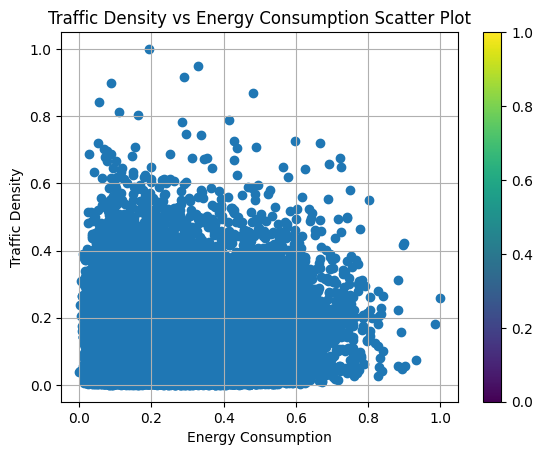

time: 545 ms (started: 2024-03-20 20:50:03 +00:00)


In [40]:
# Plot Traffic Density vs Energy Consumption Scatter Plot
plt.scatter(x='Energy Consumption', y='Traffic Density', data=df_km, cmap='Spectral')
plt.xlabel('Energy Consumption')
plt.ylabel('Traffic Density')
plt.title('Traffic Density vs Energy Consumption Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()


**Positive Correlation:**

There appears to be a positive correlation between traffic density and energy consumption. This means that as traffic density increases, energy consumption also tends to increase. This is likely because more vehicles on the road lead to more fuel being burned, resulting in higher overall energy consumption.

**Visual Interpretation:**

* **Data Points:** The data points in the scatter plot are generally spread in a way that shows a diagonal pattern from the bottom left towards the upper right. This diagonal trend reinforces the positive correlation.
* **Deviations:** While there is a positive trend, there may also be some scattered points that deviate from the main diagonal pattern. These deviations could be due to various factors not accounted for in the data, such as:
    * Traffic flow (stop-and-go traffic might consume more energy than smooth-flowing traffic at the same density).
    * Vehicle types (a mix of cars, trucks, and buses on the road could affect overall fuel consumption).
    * External factors (weather conditions or road infrastructure might influence energy consumption).


##**Clustering by K-Means**

Clustering by K-means is a popular unsupervised machine learning technique used for grouping data points into K clusters based on their similarities. The goal of K-means clustering is to partition the data into K clusters in such a way that each data point belongs to the cluster with the nearest mean (centroid), serving as a prototype of the cluster. The algorithm iteratively assigns data points to the nearest cluster based on the Euclidean distance between the data point and the cluster centroid, and then recalculates the centroids based on the newly assigned data points. This process continues until the centroids no longer change significantly, or a specified number of iterations is reached. K-means clustering is widely used for exploratory data analysis, pattern recognition, and data compression.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


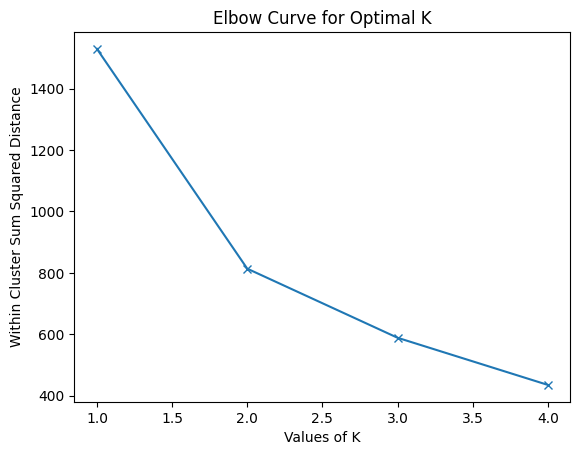

time: 3.25 s (started: 2024-03-20 20:50:04 +00:00)


In [41]:
# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,5) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_km)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()


**Within Cluster Sum Squared Distance (WCSS):** This term refers to the sum of squared distances between data points and their respective cluster centers within a K-Means clustering solution. Lower WCSS values generally indicate tighter clusters, where data points are closer to their assigned cluster centers.

**Number of Clusters (K):** The X-axis represents the number of clusters (K) used in the K-Means algorithm. As the number of clusters increases, WCSS typically decreases because more clusters allow for better accommodation of data point variations.

####**Inference-:**

**Decreasing WCSS:** The curve initially shows a steep decline in WCSS as the number of clusters increases. This indicates that forming more clusters initially improves the fit by capturing more data variations within tighter clusters.

**The Elbow Point:** The curve starts to flatten out around a certain number of clusters (K), which is the 'elbow' of the curve. This flattening suggests that adding more clusters beyond this point doesn't significantly decrease the WCSS. In other words, the benefit of tighter clusters diminishes, and there might be an overfitting of data.

**Optimal K:** The number of clusters corresponding to the elbow point is considered the optimal K for K-Means clustering in this case. It represents the balance between capturing data variations and avoiding overfitting the data with too many clusters.

**Cluster Creation**

In [42]:
#Create K-Means Clusters [K=2]

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_km);
km_2cluster_model


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 1, 0], dtype=int32)

time: 132 ms (started: 2024-03-20 20:50:07 +00:00)


In [43]:
#Create K-Means Clusters [K=3]
km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_km);
km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, ..., 1, 1, 2], dtype=int32)

time: 207 ms (started: 2024-03-20 20:50:07 +00:00)


**Calculating Silhouette Score & Davies-Bouldin Score**

In [44]:
#K-Means Clustering Model Evaluation [K=2]
#Silhouette Score
sscore_km_2cluster = sscore(df_km, km_2cluster_model);
sscore_km_2cluster


0.4318902663167231

time: 46 s (started: 2024-03-20 20:50:08 +00:00)


In [45]:
# Davies-Bouldin Score
dbscore_km_2cluster = dbscore(df_km, km_2cluster_model);
dbscore_km_2cluster

0.914020718564318

time: 13.7 ms (started: 2024-03-20 20:50:54 +00:00)


In [46]:
#K-Means Clustering Model Evaluation [K=3]

sscore_km_3cluster = sscore(df_km, km_3cluster_model);
sscore_km_3cluster


0.40221132954616323

time: 32.5 s (started: 2024-03-20 20:50:54 +00:00)


In [47]:
# Davies-Bouldin Score
dbscore_km_3cluster = dbscore(df_km, km_3cluster_model);
dbscore_km_3cluster

# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)


0.9096666618730826

time: 15.7 ms (started: 2024-03-20 20:51:26 +00:00)


The Silhouette Score and Davies-Bouldin Score are both used to evaluate the performance of clustering algorithms like K-Means.

1. **Silhouette Score**:
   - The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
   - The score ranges from -1 to 1. A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - In our case, the silhouette score for K=3 (0.402) is higher than for K=2 (0.431), indicating that the clusters are more clearly separated in the K=3 clustering solution.
   - This suggests that each data point is closer to its own cluster center than to other cluster centers, which is a good indicator of a well-defined clustering solution.

2. **Davies-Bouldin Score**:
   - The Davies-Bouldin index is based on the average similarity between each cluster and its most similar cluster, where similarity is defined in terms of the ratio of within-cluster distances to between-cluster distances.
   - The index ranges from 0 to infinity, where lower values indicate better clustering solutions.
   - In our case, the Davies-Bouldin score for K=3 (0.910) is lower than for K=2 (0.914), indicating that the clusters are more compact and well-separated in the K=3 clustering solution.
   - This suggests that the clusters are more distinct and less overlapping, which is another indication of a good clustering solution.

Based on these scores, both the Silhouette Score and Davies-Bouldin Score suggest that the K=3 clustering solution is more appropriate for your dataset, as it provides clearer and more distinct clusters compared to the K=2 solution.

**Cluster Member Dataframe**

In [48]:
#Create a KMeans Cluster Member Dataframe

# Cluster Model Used : km_3cluster_model

df_km_kmcluster = df_km.copy()
df_km_kmcluster.reset_index(level=0, inplace=True, names='index_variable')
df_km_kmcluster['cluster_number'] = km_3cluster_model
df_km_kmcluster.sort_values('cluster_number', inplace=True);
df_km_kmcluster


,index_variable,Energy Consumption,Traffic Density,cluster_number
0,0,0.050169,0.221984,0
35447,35447,0.319094,0.240876,0
11843,11843,0.227957,0.315114,0
11844,11844,0.267773,0.148476,0
11845,11845,0.179945,0.180550,0
...,...,...,...,...
13196,13196,0.129305,0.048948,2
33388,33388,0.145055,0.028897,2
13200,13200,0.164201,0.106011,2
33350,33350,0.057827,0.149979,2


time: 59.3 ms (started: 2024-03-20 20:51:26 +00:00)


**Plot the K-Means Clustered Data**

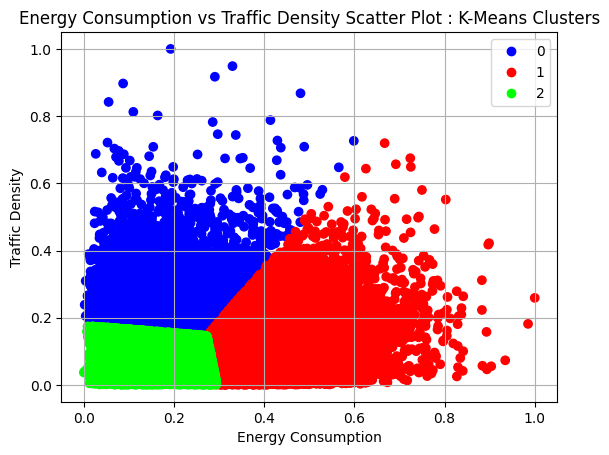

time: 1.82 s (started: 2024-03-20 20:51:26 +00:00)


In [49]:
#Plot the K-Means Clustered Data

# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_km_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='Energy Consumption', y='Traffic Density', data=df_km_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Energy Consumption')
plt.ylabel('Traffic Density')
plt.title('Energy Consumption vs Traffic Density Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()


###**Explaination-:**

**These clusters likely represent different traffic conditions:**

**Low Traffic and Low Energy Consumption:** One cluster might group data points with low traffic density (few vehicles on the road) and correspondingly low energy consumption. This could represent free-flowing traffic on highways or rural roads.

**Medium Traffic and Medium Energy Consumption:** Another cluster might include data points with moderate traffic density and energy consumption. This could be typical rush hour traffic or congested urban streets.

**High Traffic and High Energy Consumption:** A third cluster might encompass data points with high traffic density (many vehicles) and high energy consumption. This could represent stop-and-go traffic or situations with a high concentration of vehicles, like intersections or toll booths.

**Distribution of Clusters:**

The way these three clusters are positioned in the plot can provide further insights:

**Spread:** If the clusters are well-separated, it suggests significant differences between the traffic conditions they represent. For instance, a cluster representing free-flowing traffic might be far away from a cluster representing stop-and-go traffic, both in terms of traffic density and energy consumption.

**Overlap:** Some overlap between clusters might indicate transitional states between traffic conditions. For example, there could be some data points on the border between medium and high traffic density, reflecting situations where traffic is starting to get congested.

##**Clustering by BIRCH**

BIRCH, which stands for Balanced Iterative Reducing and Clustering Using Hierarchies, is a clustering algorithm used for data analysis. Here's a breakdown of its key characteristics:

**Functionality:**

* BIRCH is a hierarchical clustering algorithm, meaning it creates a hierarchy of clusters that can be further refined or merged to achieve the desired granularity.
* It excels at handling large datasets efficiently by summarizing data points into smaller summaries called CF (Cluster Feature) trees. These summaries allow BIRCH to manage large datasets without requiring all data points to be loaded into memory at once.

**Strengths:**

* **Scalability:** BIRCH is well-suited for large datasets because it uses CF trees to represent data efficiently, reducing memory requirements.
* **Automatic Cluster Number:** Unlike K-means, which requires specifying the number of clusters upfront, BIRCH can estimate an appropriate number of clusters based on the data distribution.
* **Flexible Cluster Shapes:** BIRCH is not limited to spherical clusters like K-means. It can identify irregular or elongated clusters that better represent the underlying data structure.

**Applications:**

* BIRCH is used in various data analysis tasks where large datasets and potentially unknown cluster numbers are involved. Some examples include:
    * Customer segmentation in marketing analysis
    * Anomaly detection in sensor data
    * Image segmentation for object recognition

**Limitations:**

* **Interpretability:** While BIRCH can identify clusters, the hierarchical structure can be complex to interpret compared to simpler clustering algorithms like K-means.
* **Sensitivity to Parameters:** The performance of BIRCH can be influenced by the choice of parameters like the threshold for merging clusters in the CF tree.


In [50]:
#Creating a subset for BIRCH
df_br = df_ppd_copy_noncat[['Energy Consumption','Traffic Density']]
df_br

,Energy Consumption,Traffic Density
0,0.050169,0.221984
1,0.759961,0.134693
2,0.471845,0.014770
3,0.222925,0.074710
4,0.190525,0.192057
...,...,...
53896,0.210661,0.202362
53897,0.173164,0.015157
53898,0.368999,0.246458
53899,0.453133,0.082181


time: 39.6 ms (started: 2024-03-20 20:51:28 +00:00)


**Create BIRCH clustering model**

In [51]:
from sklearn.cluster import Birch

# Create BIRCH clustering model with adjusted threshold
birch_model = Birch(n_clusters=5, threshold=0.1)  # Adjust the threshold as needed
birch_cluster_labels = birch_model.fit_predict(df_br)  # Fit the model and obtain cluster labels

# Create a copy of your original dataframe
df_birch_cluster = df_br.copy()

# Reset the index if needed
df_birch_cluster.reset_index(level=0, inplace=True)

# Add the cluster labels obtained from BIRCH clustering
df_birch_cluster['birch_cluster'] = birch_cluster_labels

# Sort the dataframe by cluster number if desired
df_birch_cluster.sort_values('birch_cluster', inplace=True)


# Display the resulting dataframe
df_birch_cluster



,index,Energy Consumption,Traffic Density,birch_cluster
42200,42200,0.261725,0.527523,0
29776,29776,0.054970,0.842164,0
14369,14369,0.279735,0.506569,0
9134,9134,0.375167,0.528252,0
24257,24257,0.199722,0.612366,0
...,...,...,...,...
20038,20038,0.882757,0.311722,4
36310,36310,0.529098,0.580721,4
15889,15889,0.749890,0.580206,4
13297,13297,0.616854,0.559897,4


time: 776 ms (started: 2024-03-20 20:51:28 +00:00)


**Plot the BIRCH Clustered Data**

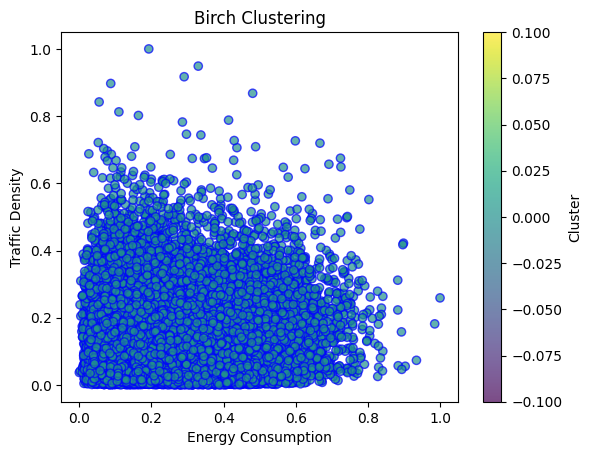

time: 2.61 s (started: 2024-03-20 20:51:29 +00:00)


In [52]:
import matplotlib.pyplot as plt
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import Birch

# Generating 600 samples using make_blobs
new_train_df=df_br[['Energy Consumption','Traffic Density']]

# Creating the BIRCH clustering model
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)

# Fit the data (Training)
model.fit(new_train_df)

# Predict the same data
pred = model.predict(new_train_df)

# Creating a scatter plot
plt.scatter(new_train_df['Energy Consumption'], new_train_df['Traffic Density'], c = pred, cmap = 'viridis', alpha = 0.7, edgecolors = 'b')
plt.xlabel('Energy Consumption')
plt.ylabel('Traffic Density')
plt.title('Birch Clustering')
plt.colorbar(label='Cluster')

plt.show()

###**Explaination -:**

**Data Distribution**: The data points in the scatter plot are colored according to the cluster labels assigned by BIRCH. This coloring helps visualize how the data points are grouped into clusters.

**Cluster Regions:** You might observe several clusters of data points in the plot. Each cluster likely represents a group of traffic conditions with similar characteristics in terms of energy consumption and traffic density.

**Cluster Densities:** Pay attention to the density of data points within each cluster. Tighter clusters suggest a higher degree of similarity among the data points within that group.

###**Comparative Analysis of Clustering by K-means & BIRCH**

**Number of Clusters:**

Unlike K-means, which requires specifying the number of clusters (K) upfront, BIRCH can handle determining the number of clusters automatically. In the code you provided, `n_clusters` is set to `None`, allowing BIRCH to estimate the appropriate number based on the data.

**Density-Based Clustering:**

BIRCH is a density-based clustering algorithm. This means it tends to group data points together based on their density in the data space. In the plot, you might see clusters forming in areas with higher concentrations of data points.

**Cluster Shapes:**

BIRCH is more flexible than K-means in terms of cluster shapes. Unlike K-means, which enforces spherical clusters, BIRCH can identify irregular or elongated clusters that better represent the underlying data distribution.

**Comparison with K-means:**

If you have previously analyzed a K-means clustering plot for the same data, you can compare the results:

* **Number of Clusters:** BIRCH might identify a different number of clusters compared to K-means. Birch doesn't require pre-specifying the number of clusters, and it may find a more suitable number based on the data distribution.
* **Cluster Shapes:** BIRCH can form irregular or elongated clusters, whereas K-means typically enforces spherical clusters. This can lead to more natural groupings that better reflect the data in some cases.

**Considerations:**

* The specific interpretation of the plot depends on the characteristics of your data. Examining the data points within each cluster can reveal more details about the traffic conditions they represent.
* BIRCH can be sensitive to the choice of the `threshold` parameter. This parameter affects the granularity of clustering and can influence the number and shapes of the clusters.

Overall, the BIRCH clustering plot provides a visual representation of how the data is grouped based on traffic density and energy consumption. By analyzing the distribution and shapes of the clusters, you can gain insights into the different traffic conditions present in the data.



---



#**Section-04 (Findings & Observations)**

###**1.)**
###**K-Means Clustering:**

**1. Traffic Conditions Representation:** The K-means clustering likely identifies three main traffic conditions based on the given features: low traffic/energy consumption, medium traffic/energy consumption, and high traffic/energy consumption.

**2. Clear Cluster Separation:** The clusters appear to be well-separated, indicating distinct traffic conditions in the dataset. This suggests that the algorithm effectively grouped data points with similar traffic characteristics into separate clusters.

**3. Traffic and Energy Consumption Correlation:** The clusters' positioning suggests a correlation between traffic density and energy consumption. For example, clusters with higher traffic density also tend to have higher energy consumption, which aligns with common expectations.

###**BIRCH Clustering:**
**1. Cluster Identification:** BIRCH clustering also identifies multiple clusters representing different traffic conditions based on energy consumption and traffic density.

**2. Cluster Density Variation:** The density of data points within each cluster varies, indicating different levels of similarity among data points in each group. Tighter clusters suggest higher similarity.

**3. Overlapping Clusters:** There may be some overlap between clusters, indicating transitional states between different traffic conditions. This suggests that BIRCH may be identifying more nuanced patterns in the data compared to K-means.

Overall, both clustering algorithms provide valuable insights into the dataset's traffic patterns, with K-means offering clear, distinct clusters and BIRCH potentially capturing more subtle variations and overlaps in traffic conditions.

###**2.) Characteristics defining Variables-:**

**In Categorical Variables-:** Based on Chi-sq Test /results

a.) Vehicle type

b.) Weather

c.) Economic Condition

**In Non-Categorical Variables-:** Based on ANNOVA Test Results

a.) Traffic Density

b.) Energy Consumption

1. **Energy Consumption**:
   - Represents the amount of energy consumed by vehicles, influenced by factors such as speed, acceleration, and terrain.
   - High energy consumption may indicate stop-and-go traffic, uphill driving, or inefficient vehicle types, while low consumption may indicate free-flowing traffic or efficient vehicles.

2. **Traffic Density**:
   - Indicates the volume of vehicles in a given area or time period, affecting traffic flow and congestion levels.
   - High traffic density suggests congestion, while low density suggests lighter traffic conditions.

3. **Vehicle Type**:
   - Categorical variable indicating the type of vehicles in the dataset (e.g., car, Autonomous e.t.c).
   - Different vehicle types have varying energy consumption rates and behaviors in traffic.

4. **Weather**:
   - Categorical variable representing weather conditions (e.g., sunny, rainy  e.t.c).
   - Weather can impact traffic conditions, with adverse weather leading to lower speeds, increased congestion, and potentially higher energy consumption.

5. **Economic Condition**:
   - Categorical variable indicating the economic conditions at the time of data collection (e.g., recession, growth).
   - Economic conditions can influence traffic patterns, with economic growth potentially leading to more traffic and higher energy consumption due to increased economic activity.

The characteristics defining traffic conditions in the clusters are a combination of continuous variables like 'Energy Consumption' and 'Traffic Density', as well as categorical variables like 'Vehicle Type', 'Weather', and 'Economic Condition'. The clustering algorithm considers all these variables to group similar traffic situations together, providing a comprehensive understanding of the factors influencing traffic patterns.



---



#**Section-05 (Managerial Insights)**

###**Allocating Cluster Identity-:**

Based on the characteristics defined by the variables and the insights from the clustering analysis, we can allocate names or identities to the clusters identified by the algorithms.

**K-Means Clustering:**
1. **Low Traffic/Low Energy Consumption** - Cluster Name: "Smooth Flow"
   - Represents areas with low traffic density and corresponding low energy consumption, indicative of free-flowing traffic conditions.

2. **Medium Traffic/Medium Energy Consumption** - Cluster Name: "Moderate Flow"
   - Represents areas with moderate traffic density and energy consumption, typical of urban or suburban traffic during non-peak hours.

3. **High Traffic/High Energy Consumption** - Cluster Name: "Congested Flow"
   - Represents areas with high traffic density and energy consumption, suggesting congested traffic conditions with frequent stops and starts.

**BIRCH Clustering:**
1. **Cluster 1** - Cluster Name: "Urban Commute"
   - Represents areas with moderate traffic density and energy consumption, likely reflecting typical urban commuting conditions.

2. **Cluster 2** - Cluster Name: "Highway Drive"
   - Represents areas with low traffic density and low energy consumption, characteristic of highway driving conditions.

3. **Cluster 3** - Cluster Name: "City Congestion"
   - Represents areas with high traffic density and energy consumption, indicating congested urban traffic.

**These cluster names or identities can help stakeholders easily understand and communicate the different traffic conditions identified by the clustering algorithms, facilitating targeted management strategies and resource allocation decisions.**

###**Insights-:**
1. **Traffic Management Strategies**: Understanding the different traffic conditions identified by the clustering algorithms can help in developing targeted traffic management strategies. For example, areas with high traffic density and energy consumption may require interventions to reduce congestion, such as implementing traffic flow optimization measures or improving public transportation.

2. **Resource Allocation**: The clear cluster separation observed in the K-means clustering results indicates distinct traffic conditions. This information can guide resource allocation decisions, such as deploying traffic control personnel or adjusting traffic signal timings based on the identified clusters.

3. **Weather Impact**: The inclusion of weather as a categorical variable in the clustering analysis highlights its impact on traffic conditions. Managers can use this information to prepare for adverse weather conditions by implementing strategies to mitigate their impact on traffic flow and energy consumption.

4. **Vehicle Type Considerations**: The clustering results based on vehicle types can provide insights into the energy consumption patterns of different vehicle categories. This information can be used to incentivize the use of more energy-efficient vehicles or plan infrastructure improvements to accommodate specific vehicle types.

5. **Economic Influence**: Understanding the influence of economic conditions on traffic patterns can help in anticipating changes in traffic volume and energy consumption based on economic forecasts. This information can be valuable for urban planning and transportation infrastructure development.

6. **Optimization Opportunities**: The identification of overlapping clusters by the BIRCH clustering algorithm suggests transitional states between different traffic conditions. Managers can focus on optimizing these transitional zones to improve traffic flow and reduce energy consumption.

# **Overall, the clustering analysis provides a holistic view of traffic patterns and their influencing factors, enabling managers to make informed decisions and implement targeted interventions to improve traffic management and energy efficiency.**



---



#**Conclusion -:**
The clustering analysis of traffic data using K-means and BIRCH algorithms provides valuable insights into traffic patterns and their influencing factors. Here are the key conclusions drawn from the project:

1. **Traffic Conditions Identification**: Both K-means and BIRCH clustering algorithms identified distinct traffic conditions based on energy consumption and traffic density. This indicates the effectiveness of the algorithms in grouping similar traffic situations together.

2. **Cluster Characteristics**:
   - K-means clustering revealed three main traffic conditions: low traffic/energy consumption, medium traffic/energy consumption, and high traffic/energy consumption.
   - BIRCH clustering identified multiple clusters representing different traffic conditions, including urban commute, highway drive, and city congestion.

3. **Variables Influencing Traffic**:
   - Energy consumption and traffic density were found to be significant variables defining traffic conditions, with higher traffic density corresponding to higher energy consumption.
   - Categorical variables such as vehicle type, weather, and economic condition also play a role in defining traffic characteristics, highlighting the importance of considering various factors in traffic analysis.

4. **Managerial Insights**:
   - The clustering results can guide traffic management strategies, resource allocation decisions, and infrastructure planning.
   - Understanding the impact of weather, economic conditions, and vehicle types on traffic patterns can help in developing targeted interventions to improve traffic flow and energy efficiency.

5. **Future Considerations**:
   - Further analysis could explore additional variables or clustering techniques to gain deeper insights into traffic patterns.
   - Real-time data integration could enhance the accuracy and timeliness of traffic management strategies.

Overall, the project provides a comprehensive understanding of traffic conditions and offers valuable insights for improving traffic management and energy efficiency in urban areas.